# Load Dataset

In [194]:
import pandas as pd
# mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
mpl.rc('font', family='AppleGothic')
# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
mpl.rc('axes', unicode_minus=False)

### Data fields
+ Dates - timestamp of the crime incident
+ **Category** - category of the crime incident (only in train.csv). This is the target variable.
+ Descript - detailed description of the crime incident (only in train.csv)
+ DayOfWeek - the day of the week
+ PdDistrict - name of the Police Department District
+ Resolution - how the crime incident was resolved (only in train.csv)
+ Address - the approximate street address of the crime incident 
+ X - Longitude
+ Y - Latitude

In [196]:
# EDA를 위해서 train 데이터셋만 불러옵니다
train = pd.read_csv("./sanfran/train.csv")
print(train.shape)
print(train.dtypes)
train.head()

(878049, 9)
Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Exploratory Data Analysis

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dates

In [198]:
train["Dates"] = pd.to_datetime(train["Dates"])
test["Dates"] = pd.to_datetime(train["Dates"])

In [228]:
#Split Dates to YY-MM-DD-HH-MM-SS Columns
import numpy as np
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-min"] = np.abs(train["Dates"].dt.minute - 30)
train["Dates-sec"] = train["Dates"].dt.second

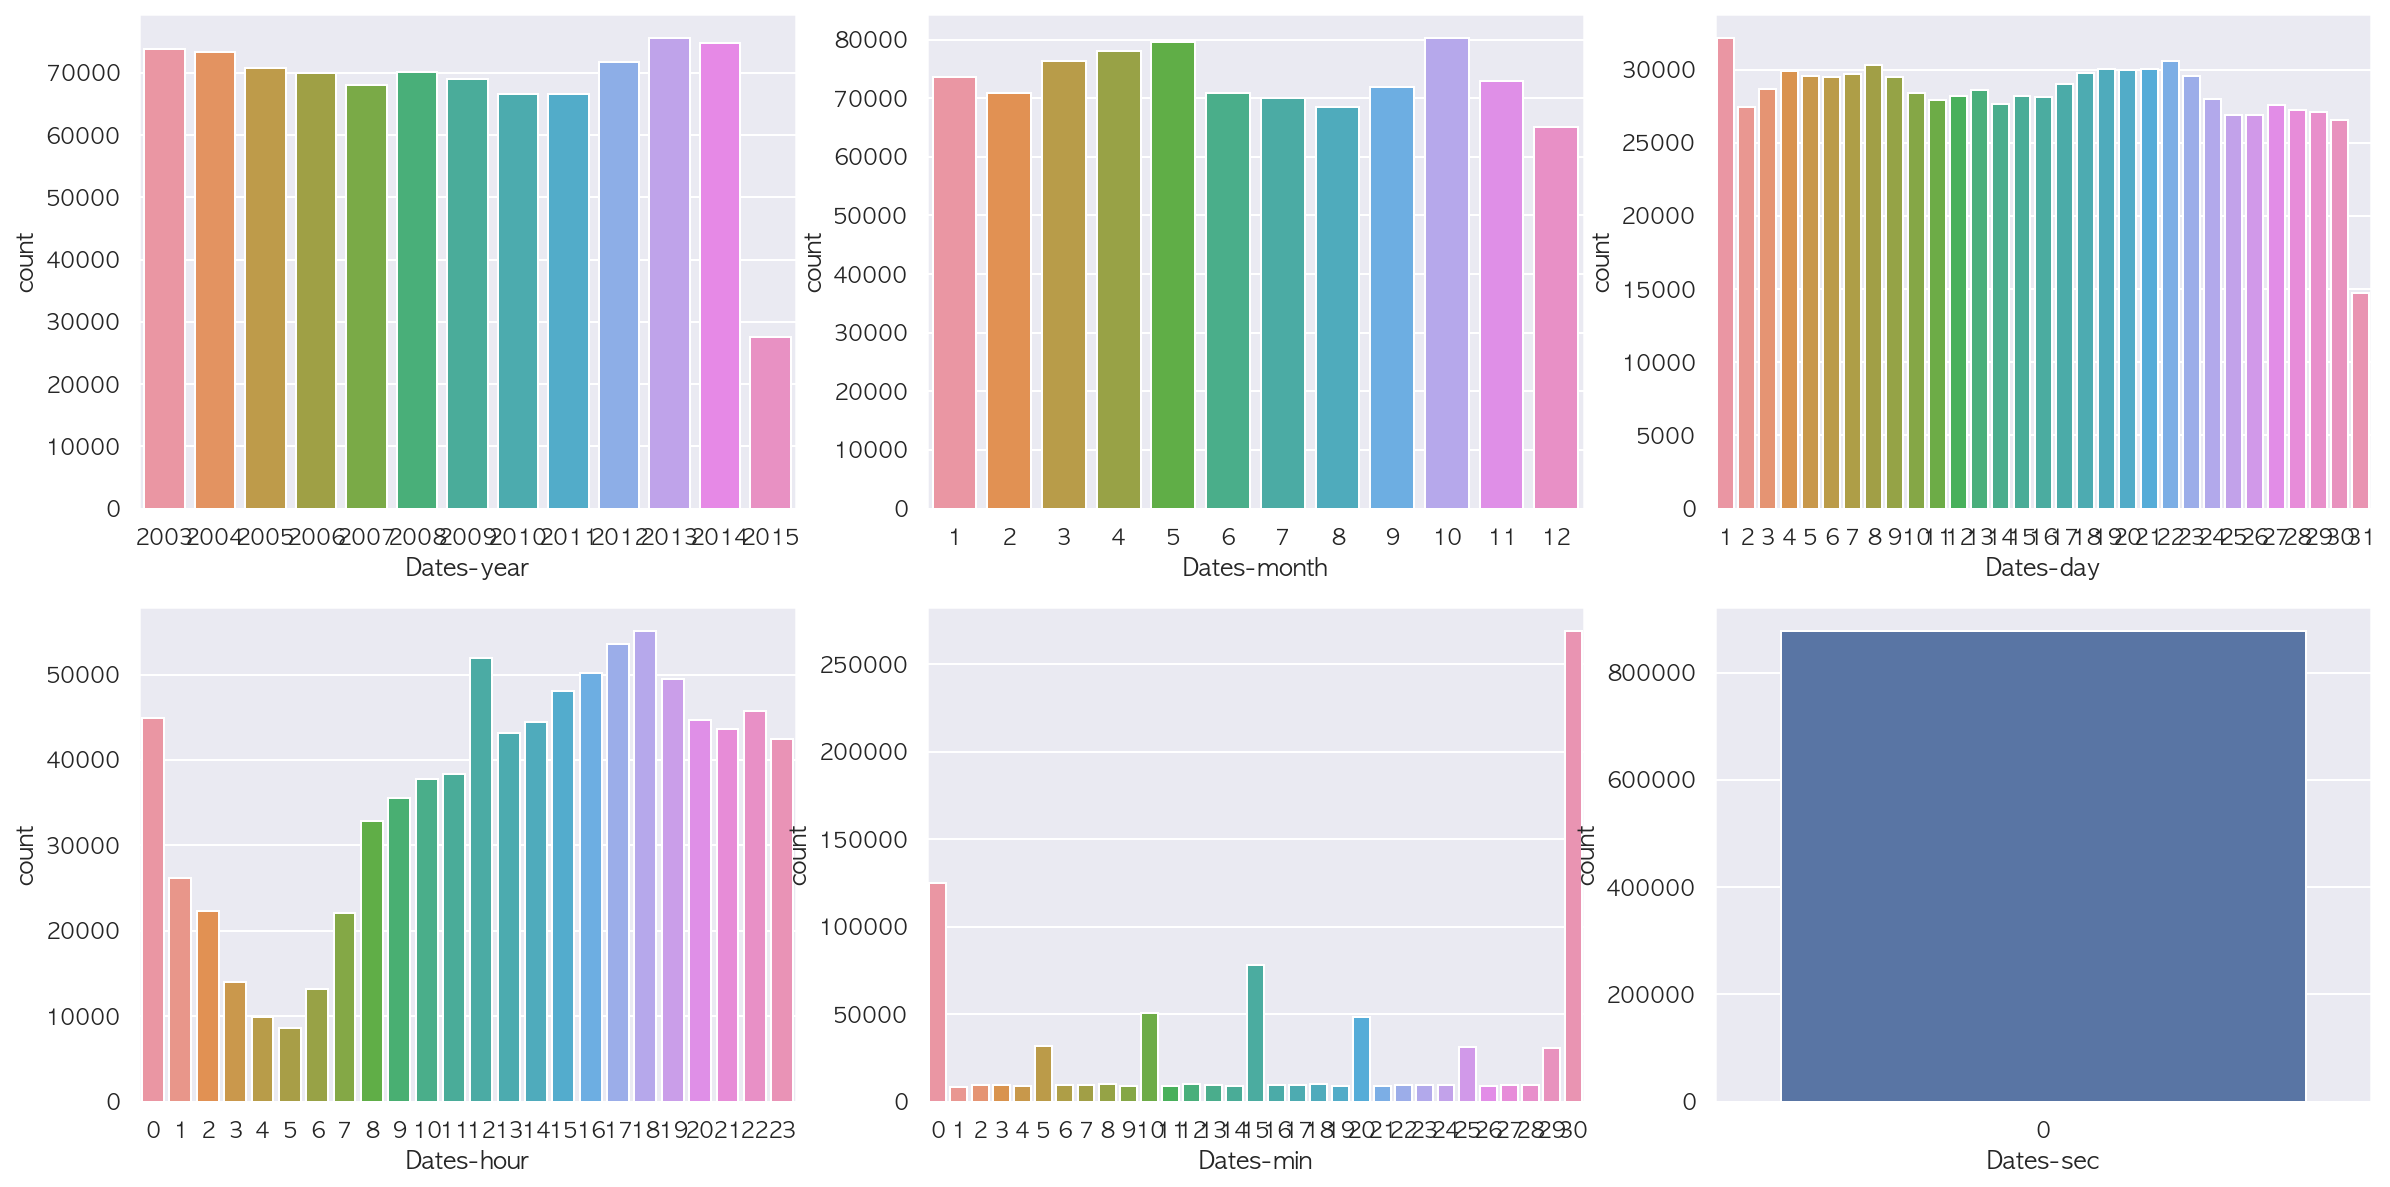

In [229]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(20,10)
sns.countplot(data=train, x="Dates-year",ax=ax1)
sns.countplot(data=train, x="Dates-month",ax=ax2)
sns.countplot(data=train, x="Dates-day",ax=ax3)
sns.countplot(data=train, x="Dates-hour",ax=ax4)
sns.countplot(data=train, x="Dates-min",ax=ax5)
sns.countplot(data=train, x="Dates-sec",ax=ax6)

범죄 발생 연도, 월, 일, 시까지는 예측 모델을 만드는데 도움이 될 수 있으나 분, 초는 범죄 발생 가능성을 예측하는데 있어 크게 도움이 될 것 같지않음. 분과 초는 데이터를 입력하는 사람이 정기적 혹은 임의로 맞췄을 가능성이 크기 때문에 범죄 발생을 예측하는데 있어서 의미가 크지 않음 (분을 보면 0분과 30분에 특히 많은 것은 시간 설정이 디폴트로 00분에 맞춰져 있는것을 그대로 사용했을 가능성이 크고, 범죄가 정각에만 발생하는 것은 아니기 때문).

### Coordinates X, Y

In [201]:
train[["X","Y"]].head()

,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541


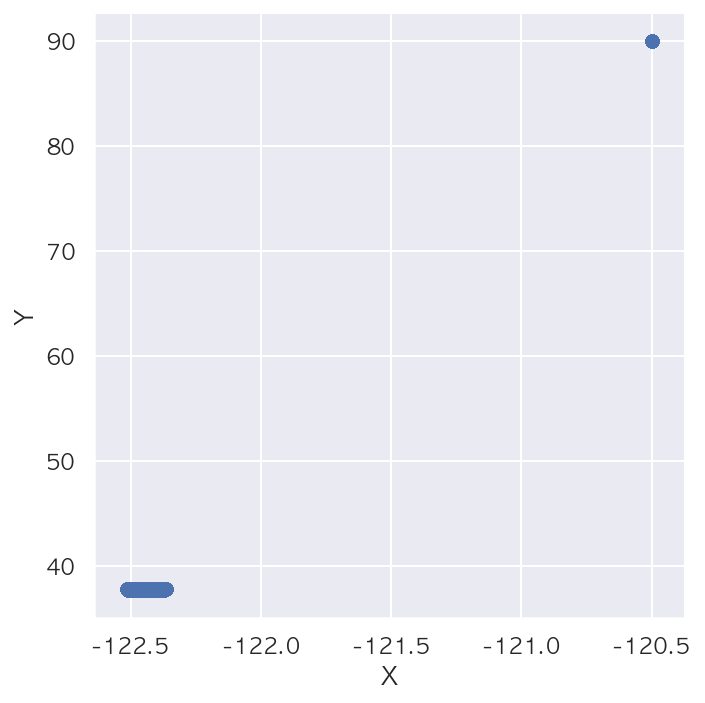

In [202]:
sns.lmplot(data=train,x="X",y='Y',fit_reg=False)

위치가 San Francisco 지도를 보일거라고 예상 했지만 다수의 outlier로 인해 자세히 보이지가 않기 때문에 일단 outlier를 찾아낸 후에 제거하고 나서 변화가 있는지 다시 조사해봄

In [203]:
#outlier로 추정되는 value 찾기
train["X"].max(),train["Y"].max()

(-120.5, 90.0)

In [204]:
X_outliers =(train["X"]==train["X"].max())
Y_outliers =(train["Y"]==train["Y"].max())
outlier = train[X_outliers & Y_outliers]
print(outlier.shape)
outlier.head()

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-min,Dates-sec
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0


좌표가 똑같은데도 불구하고 주소를 보면 전혀 다른 주소지들이 나오는 것을 알수 있음. 행정상의 오류로 인한 실수 혹은 좌표 미입력시 자동으로 X,Y의 최대치를 디폴트로 넣었을 가능성이 있으나, 데이터의 갯수를 봤을 때 outlier 없이 진행을 해도 통계적으로 유의미한 차이를 낼 것 같지않기 때문에 일단 제거 한 후 EDA를 진행하겠음 (878049 vs. 67)

In [205]:
non_outliers = train[~(X_outliers & Y_outliers)]

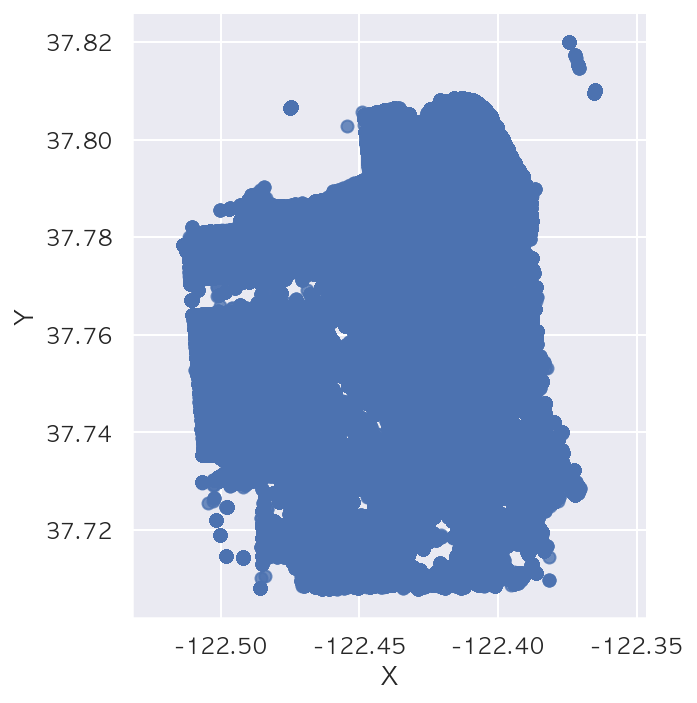

In [206]:
sns.lmplot(data=non_outliers, x="X",y="Y",fit_reg = False)

## Day of Week

Text(0.5, 0, '요일')

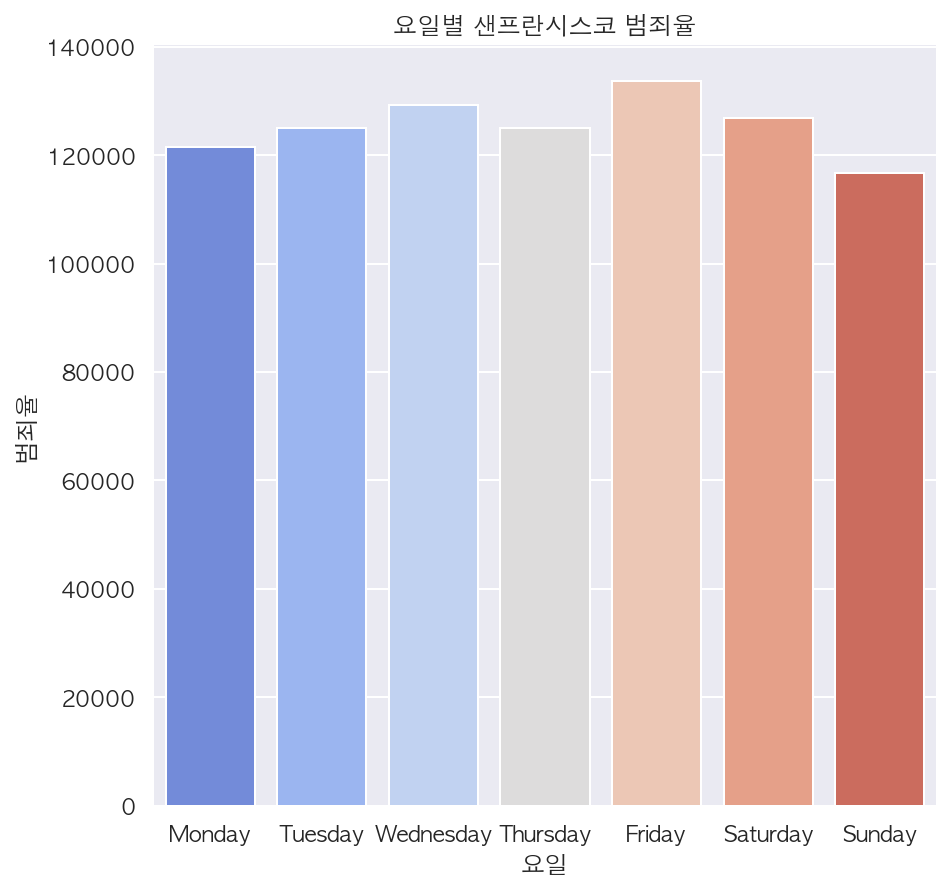

In [207]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

dayofweek = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=train, x="DayOfWeek", order=dayofweek, palette="coolwarm")
ax.tick_params(bottom=False, left=False, top=False, right=False)

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title("요일별 샌프란시스코 범죄율")
ax.set_ylabel("범죄율")
ax.set_xlabel("요일")

In [208]:
total_num_crimes_by_dow = pd.pivot_table(data=train,
              index="DayOfWeek",
              values="Category",
              aggfunc="count")
#요일별로 정렬
total_num_crimes_by_dow = total_num_crimes_by_dow.loc[dayofweek]
total_num_crimes_by_dow

,Category
DayOfWeek,
Monday,121584
Tuesday,124965
Wednesday,129211
Thursday,125038
Friday,133734
Saturday,126810
Sunday,116707


금요일에 범죄율이 가장 높게 나오는데 간단한 추측으로는 미국 역시 주5일제를 시행하고 있기 때문에 금요일에 일이 끝난 후 사람들이 주말을 시작하기 전 음주를 한 후에 긴장이 풀려 우발적 범죄를 저지를 확률이 더 높아서 그럴 수도 있다는 가능성이 있지만 확실하게 하기 위해서 범죄별로 나눠서 가설이 맞을지 확인

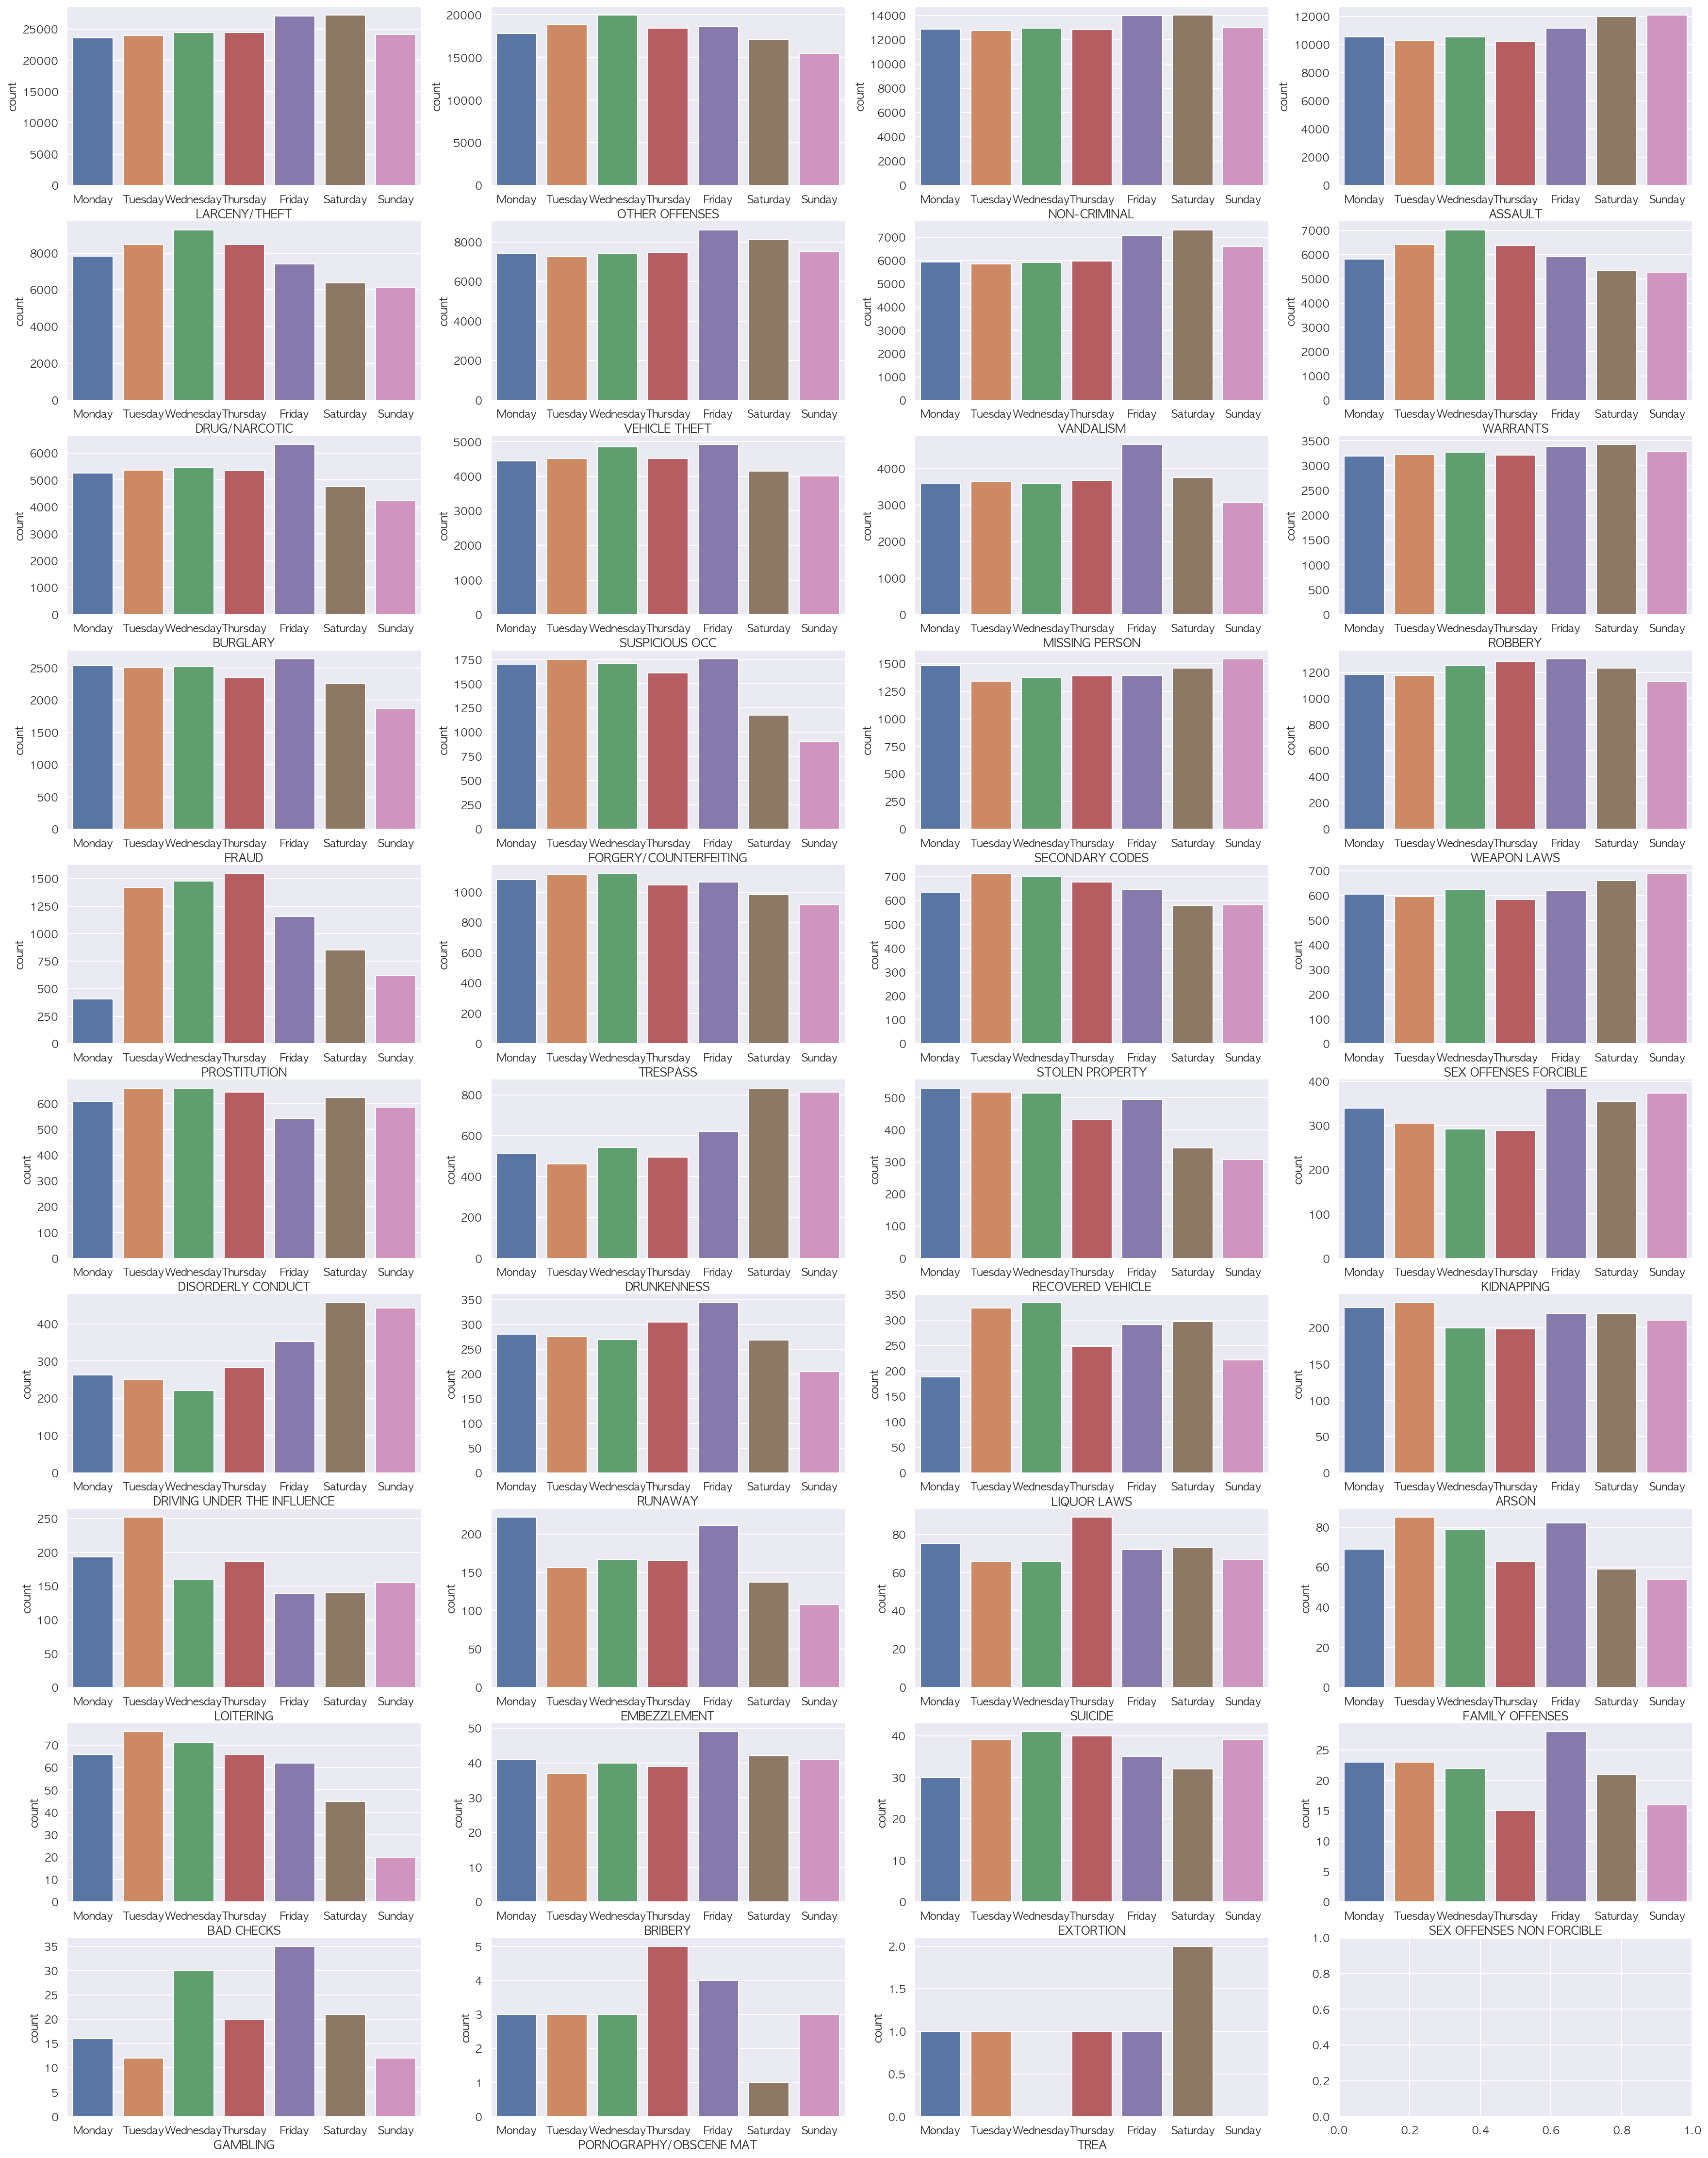

In [209]:
fig, axes = plt.subplots(nrows=10,ncols=4)
fig.set_size_inches(30,40)
category_list= train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        if index < len(category_list):
            category = category_list[index]
            ax = axes[row][column]
            ax.tick_params(bottom=False, left=False, top=False, right=False)

            for key, spine in ax.spines.items():
                spine.set_visible(False)
            target= train[train["Category"] == category]
            sns.countplot(data=target, x = "DayOfWeek", order = dayofweek, ax = ax)
            ax.set(xlabel=category)

음주와 관련 된 범죄는 압도적으로 토요일에 더 많이 일어나는 것을 비추어 보았을 때 초기에 세웠던 가설은 틀린 것으로 판명이 되었으나 강도/절도 사건 등이 많이 일어나는 것이 금요일이라는 것을 알 수 있음. 그리고 평일보다는 주말에 범죄가 더 많이 일어나는 것을 알 수 있습니다.  

In [210]:
district = pd.pivot_table(data=train, index="PdDistrict",
                       values="Category",
                       aggfunc="count")
district = pd.DataFrame(district)

district.index

Index(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'],
      dtype='object', name='PdDistrict')

[]

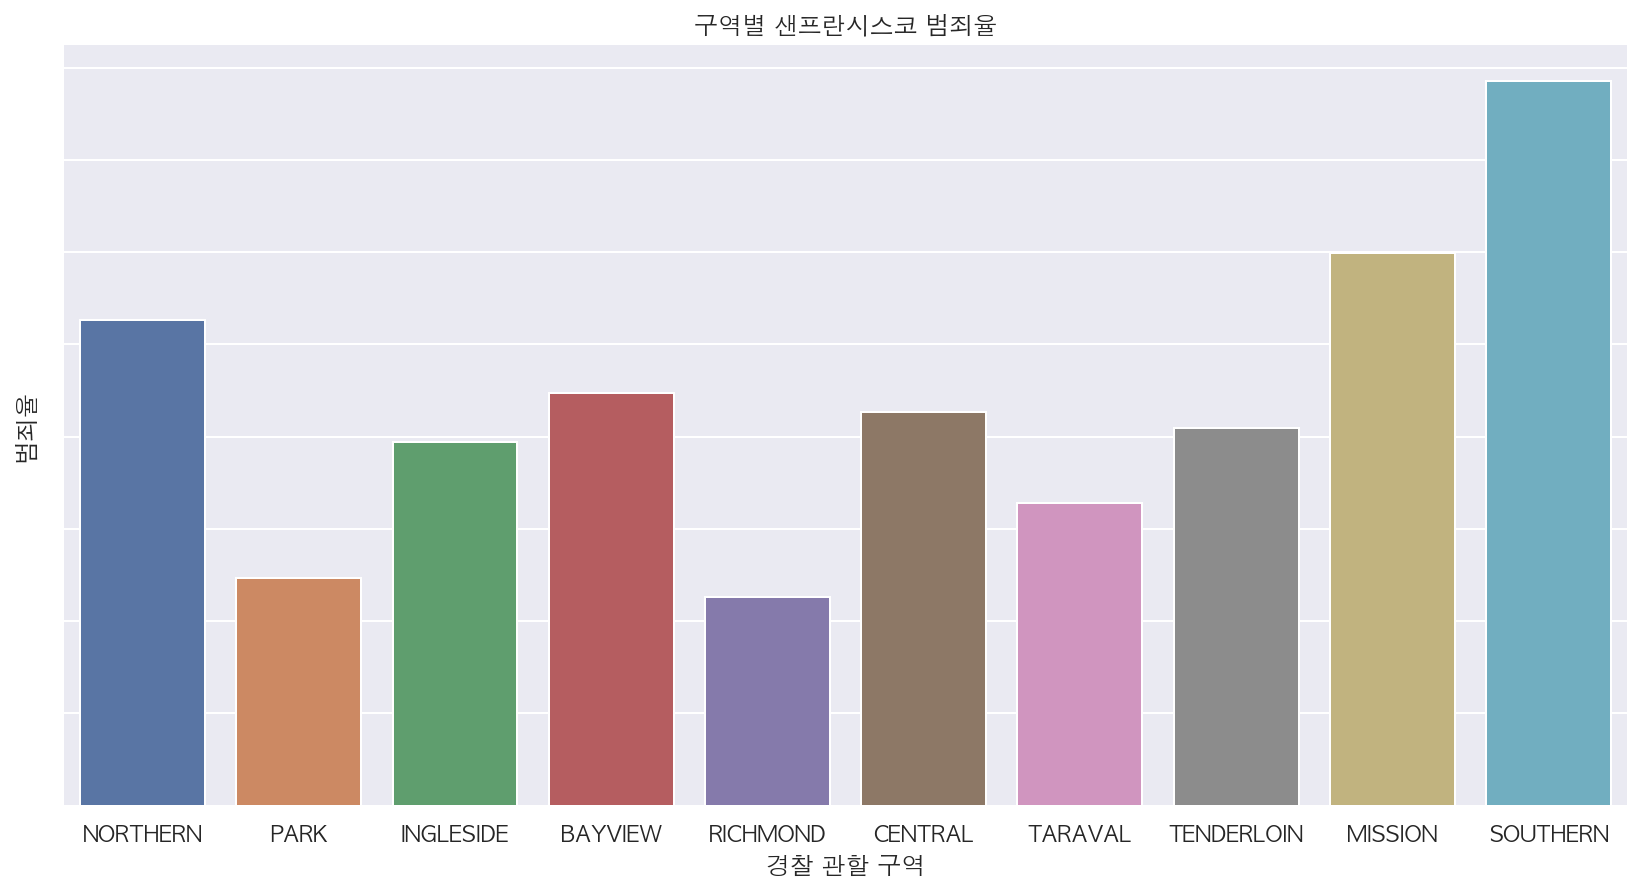

In [211]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.countplot(data=train, x="PdDistrict")

ax.tick_params(bottom=False, left=False, top=False, right=False)

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title("구역별 샌프란시스코 범죄율")
ax.set_ylabel("범죄율")
ax.set_xlabel("경찰 관할 구역")
ax.set_yticklabels("")

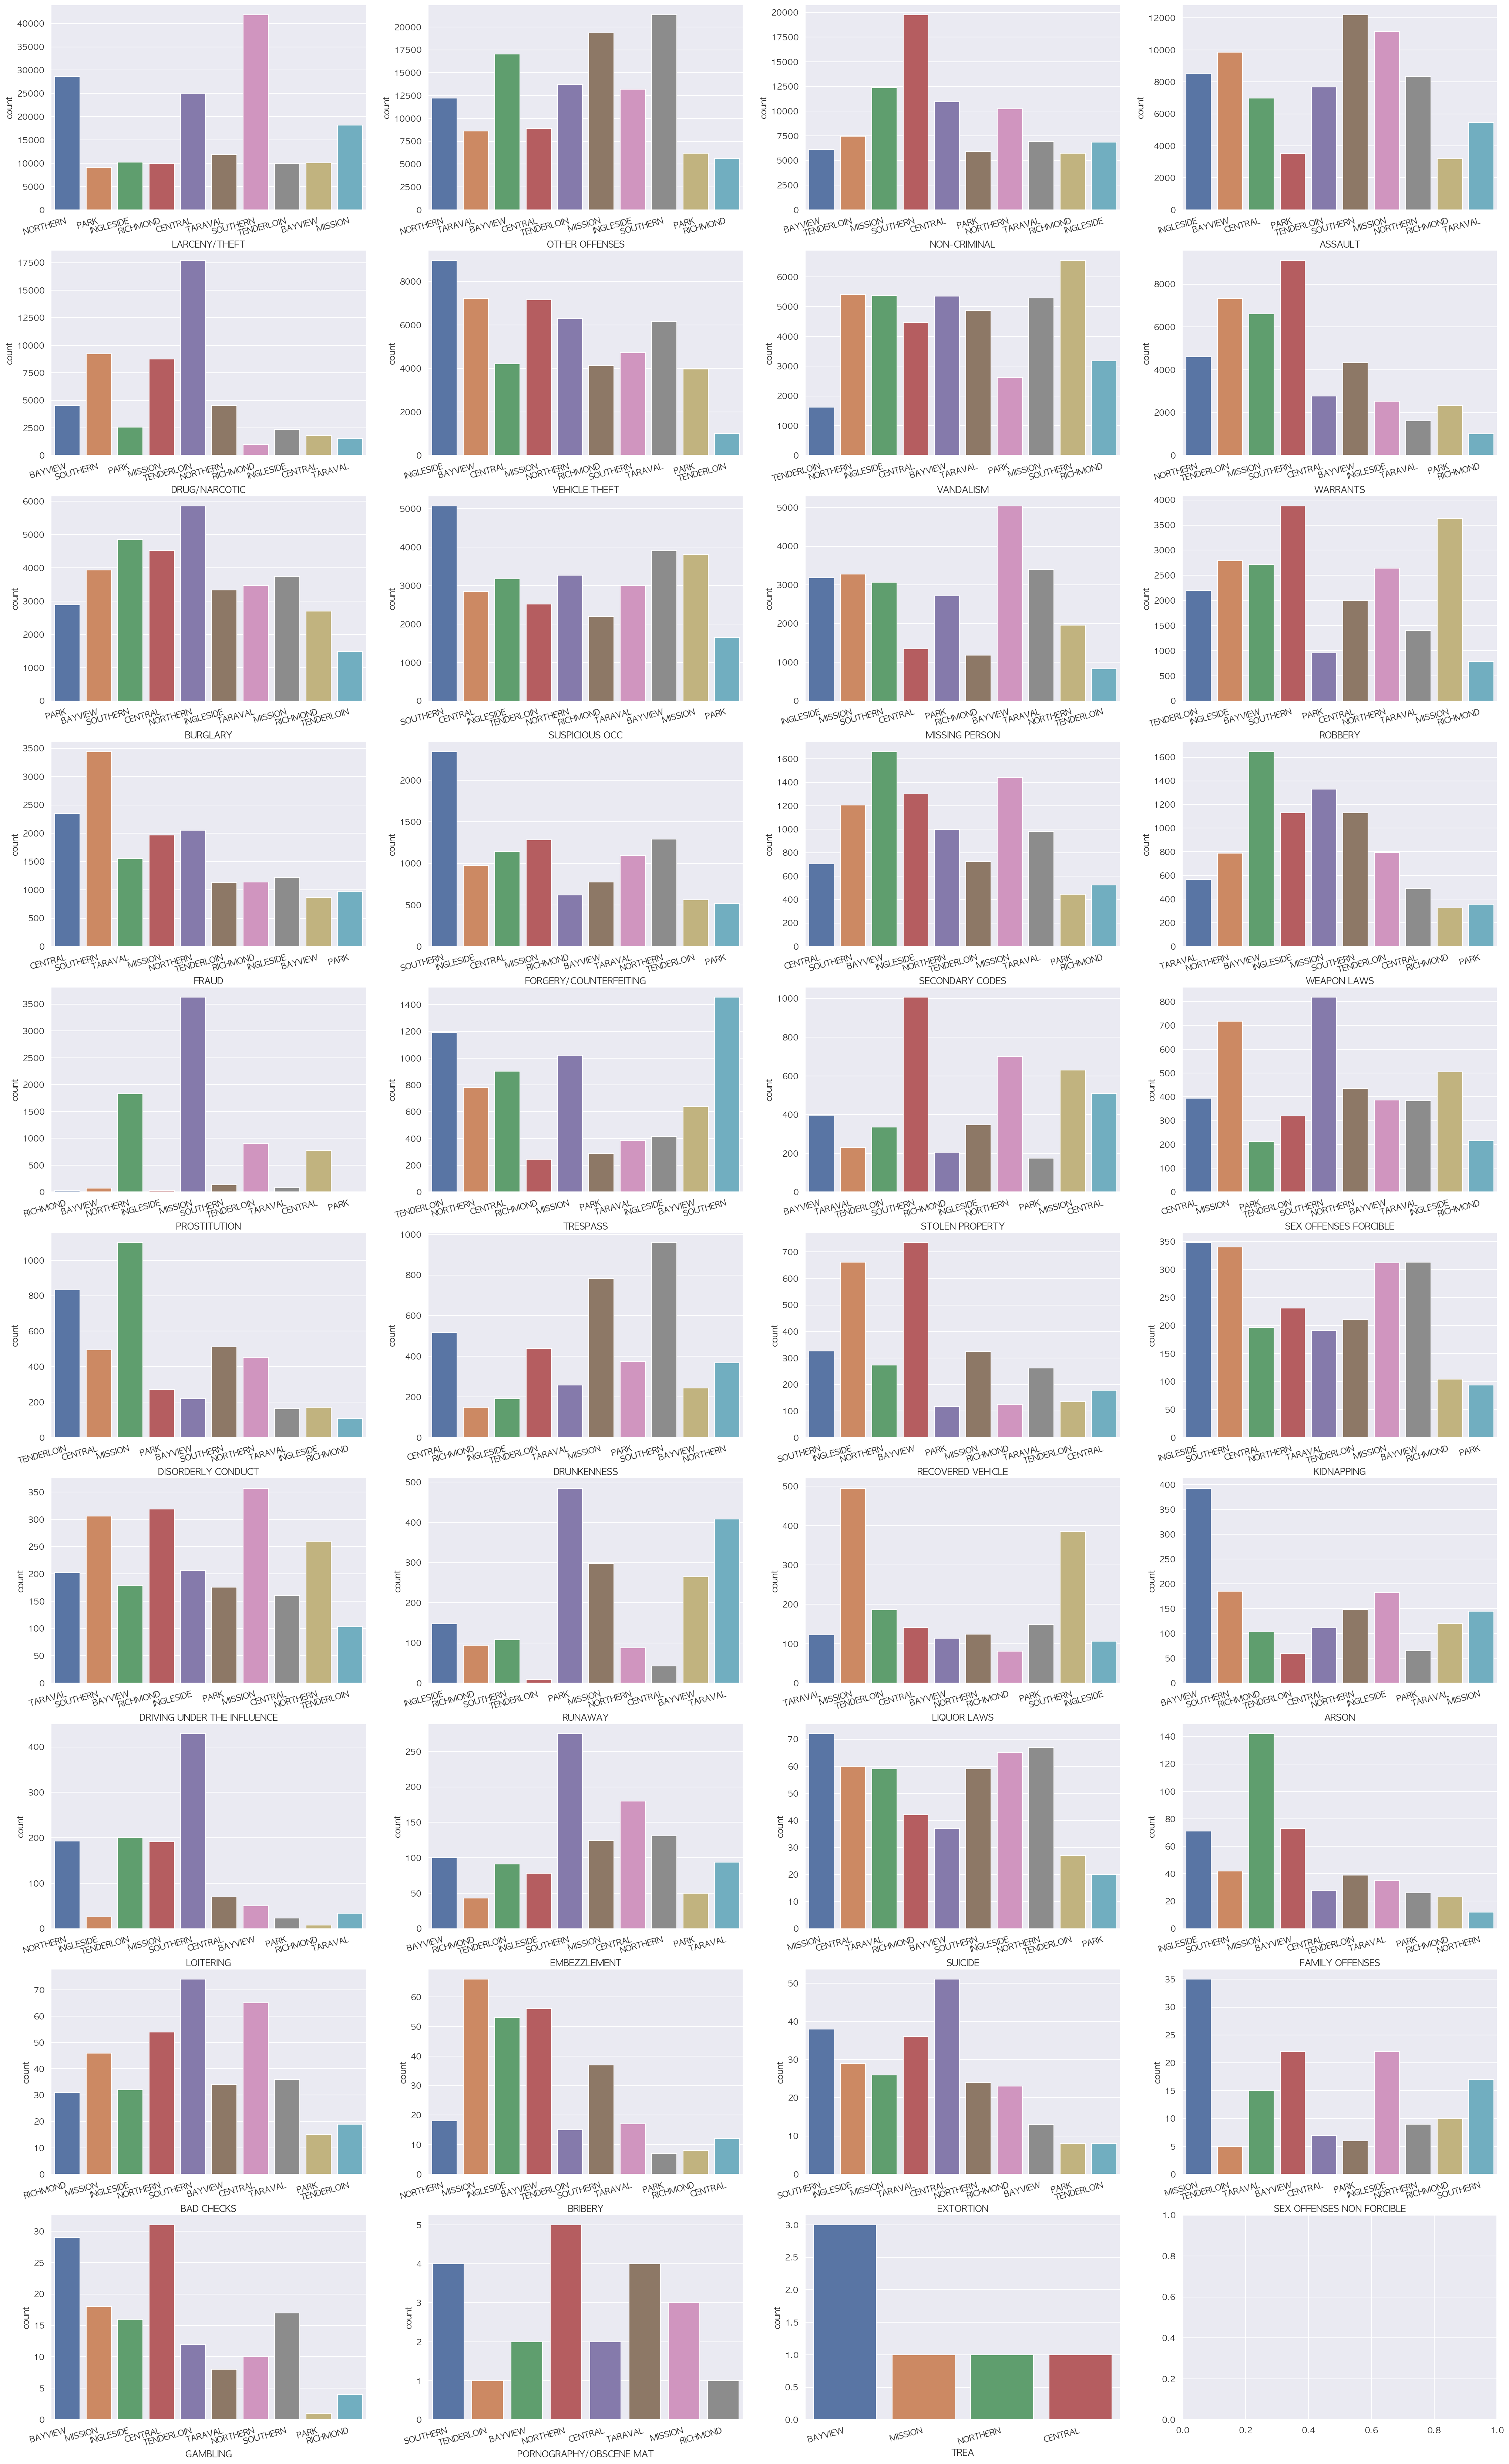

In [212]:
fig, axes = plt.subplots(nrows=10,ncols=4)
fig.set_size_inches(35,60)
category_list= train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        if index < len(category_list):
            category = category_list[index]
            ax = axes[row][column]
            ax.tick_params(bottom=False, left=False, top=False, right=False)
            fig.subplots_adjust(hspace=0.2)

            for key, spine in ax.spines.items():
                spine.set_visible(False)
            target = train[train["Category"] == category]
            plot = sns.countplot(data=target, x = "PdDistrict", ax = ax)
            ax.set(xlabel=category)
            plot.set_xticklabels(plot.get_xticklabels(), rotation=15, horizontalalignment='right')
            plot

In [213]:
import folium
import numpy as np
sanfran_geo = r"san-francisco.geojson"

district = pd.DataFrame(train.groupby("PdDistrict")["Category"].count())

district = district.reset_index()

sanfran_map = folium.Map(location=[37.7749, -122.4194], 
                         zoom_start=13, 
                         tiles='openstreetmap',
                        detect_retina=True,
                        )
threshold_scale = np.linspace(district['Category'].min(),
                              district['Category'].max(),
                              7, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1

folium.Choropleth(
    geo_data=sanfran_geo,
    data=district,
    columns=['PdDistrict','Category'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='Crime in San Francisco',
    reset=True,
    highlight = True,
    name=['PdDistrict']
).geojson.add_child(
    folium.features.GeoJsonTooltip(['DISTRICT'],labels=False)
).add_to(sanfran_map)
sanfran_map

각 구역별로 빈번히 일어나는 범죄들이 다른 것을 시각화를 통해서 알 수 있는데 이는 예측 모델의 중요한 피처로 활용될 수 있음.
또 시각화를 통해 알 수 있는 것은 상대적으로 인프라 지원이 부족한 Southern district에서 범죄율이 높음. 이것이 위치적 요인이 큰 것인지 아니면 또 타지역보다 압도적으로 범죄율이 높은 다른 요인이 있는지 (시스템상 오류/디폴트 가능성) 더 알아볼 가치가 있기 때문에 Southern District에 집중해서 알아보겠음.

EXCEPTIONAL CLEARANCE                     28.17
NOT PROSECUTED                            21.30
PSYCHOPATHIC CASE                         21.00
PROSECUTED BY OUTSIDE AGENCY              19.21
ARREST, BOOKED                            18.63
ARREST, CITED                             18.28
NONE                                      17.83
UNFOUNDED                                 16.48
DISTRICT ATTORNEY REFUSES TO PROSECUTE    14.82
JUVENILE CITED                            14.29
CLEARED-CONTACT JUVENILE FOR MORE INFO    13.82
COMPLAINANT REFUSES TO PROSECUTE          13.15
JUVENILE BOOKED                           12.83
JUVENILE DIVERTED                         11.27
LOCATED                                   11.15
PROSECUTED FOR LESSER OFFENSE              9.80
JUVENILE ADMONISHED                        7.70
Name: Resolution, dtype: float64


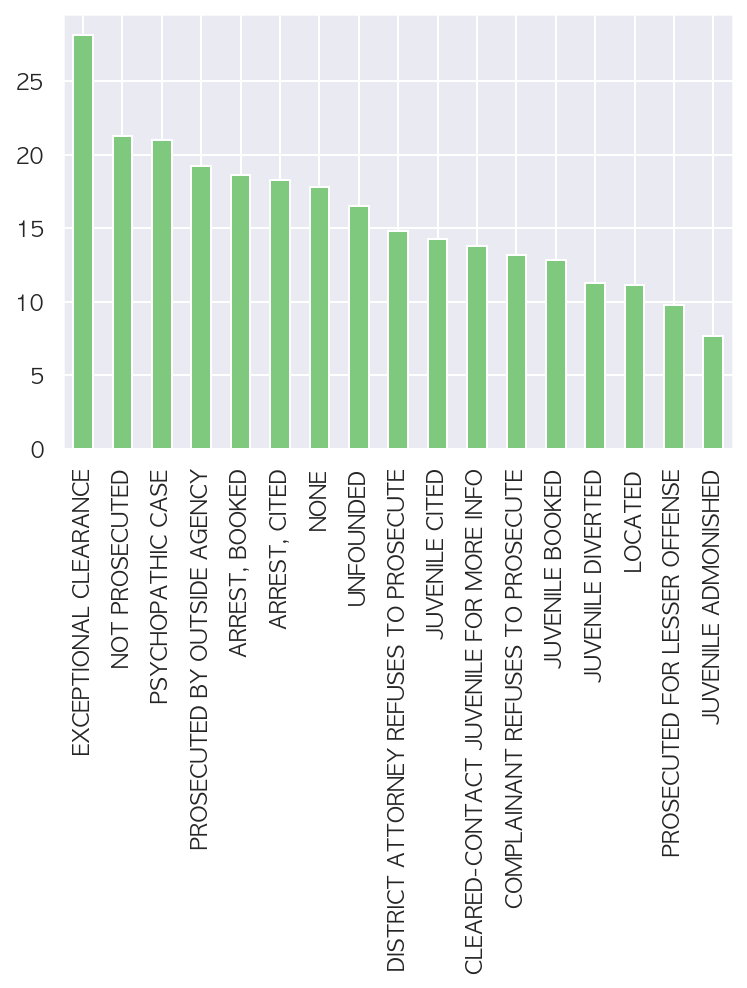

In [214]:
southern_resolution_percentage = round((train.loc[train.PdDistrict=='SOUTHERN'].Resolution.value_counts() / train.Resolution.value_counts())*100,2)
print(southern_resolution_percentage.sort_values(ascending=False))
southern_resolution_percentage.sort_values(ascending=False).plot(kind='bar',cmap='Accent')

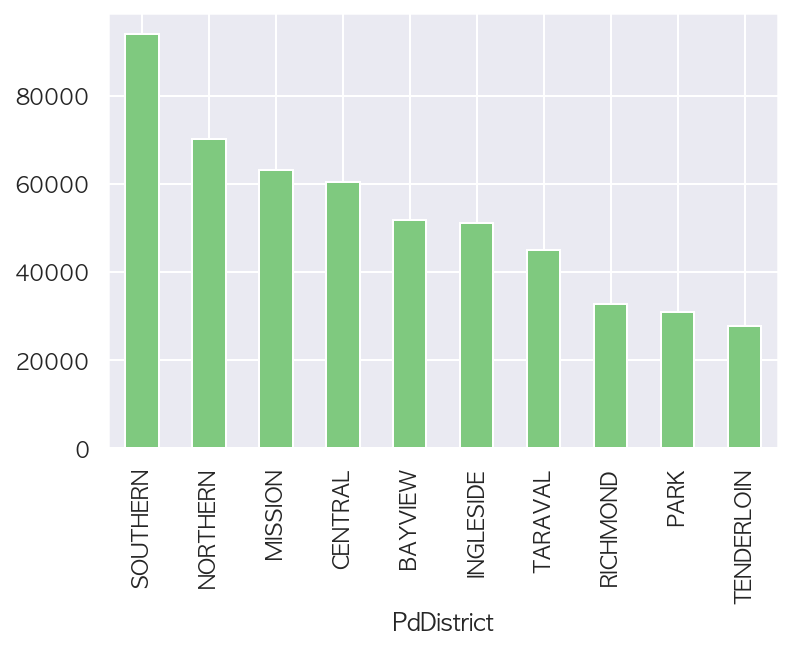

In [215]:
train.loc[train.Resolution=='NONE'].groupby('PdDistrict')['Resolution'].count().sort_values(ascending=False).plot(kind='bar',cmap="Accent")

시각화로 봤을 때도 Southern district가 Resolution 칼럼의 None 갯수가 상당히 많은 것을 알수 있음. 그렇기 때문에 이 수치가 정확한 범죄수를 계산하는데 혼선을 초래할 수 있는 가능성도 있다고 생각 됨. 향후 모델의 예측도에 영향을 끼치는지 시험해보고 제거 여부를 판단할 필요가 있음.

## Address

In [216]:
print(train.loc[train.Address.str.contains("LAGUNA ST / OAK ST")].shape)
train.loc[train.Address.str.contains("LAGUNA ST / OAK ST")].head()

(27, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-min,Dates-sec
106008,2013-12-11 16:55:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2013,12,11,16,55,0
154395,2013-04-30 11:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2013,4,30,11,0,0
219632,2012-06-03 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2012,6,3,23,0,0
283267,2011-07-01 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2011,7,1,0,1,0
314544,2011-01-12 09:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2011,1,12,9,15,0


In [217]:
print(train.loc[train.Address.str.contains("OAK ST / LAGUNA ST")].shape)
train.loc[train.Address.str.contains("OAK ST / LAGUNA ST")].head()

(45, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-min,Dates-sec
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
12956,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,3,8,8,50,0
27204,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Monday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,1,5,20,0,0
65580,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,2014,6,29,17,12,0


사실상 같은 위치 (X,Y가 같음)인데 순서가 틀리다는 이유로 머신러닝 알고리즘은 각각 다른 장소로 판단할 가능성이 있음 (예: 피처 엔지니어링으로 원핫인코딩 등을 진행시).

In [218]:
# 중복됐지만 순서만 틀린 주소들의 순서를 모두 하나로 통일.
def clean_address(address):
    if "/" not in address:
        return address
    address1, address2 = address.split("/")
    address1, address2 = address1.strip(), address2.strip()
    if address1 < address2:
        address = f"{address2} / {address1}"
    else:
        address = f"{address1} / {address2}"
    return address

In [219]:
train['Address'] = train['Address'].apply(clean_address)

In [220]:
#함수가 제대로 적용 됐는지 확인
train['Address'].loc[train['Address']=='LAGUNA ST / OAK ST']

Series([], Name: Address, dtype: object)

In [221]:
train['Address'].loc[train['Address']=='OAK ST / LAGUNA ST']

0         OAK ST / LAGUNA ST
1         OAK ST / LAGUNA ST
12956     OAK ST / LAGUNA ST
27204     OAK ST / LAGUNA ST
65580     OAK ST / LAGUNA ST
                 ...        
774042    OAK ST / LAGUNA ST
805226    OAK ST / LAGUNA ST
826903    OAK ST / LAGUNA ST
849461    OAK ST / LAGUNA ST
855861    OAK ST / LAGUNA ST
Name: Address, Length: 72, dtype: object

교차로에서 사건이 일어났는지 여부에 따라 범죄율에 차이가 있을지 시각화

In [222]:
train["Crossroad"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "Crossroad"]].head()

(878049, 16)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


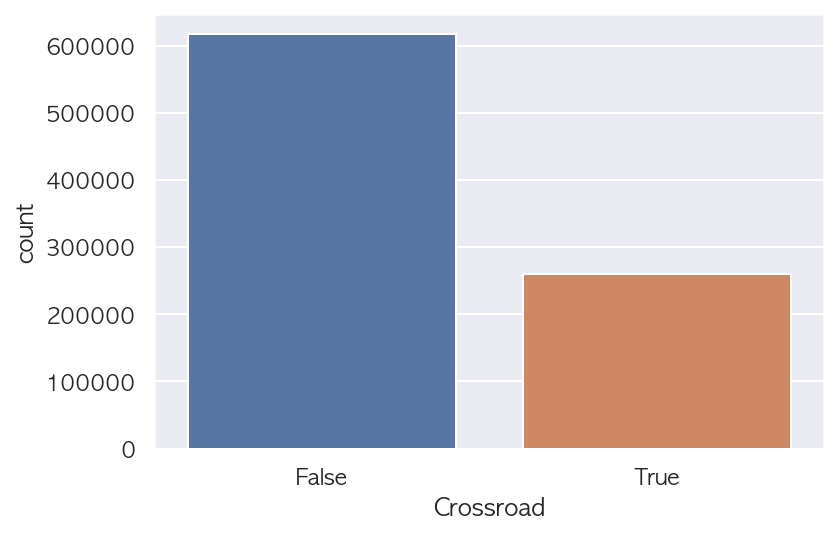

In [223]:
sns.countplot(data=train, x="Crossroad")

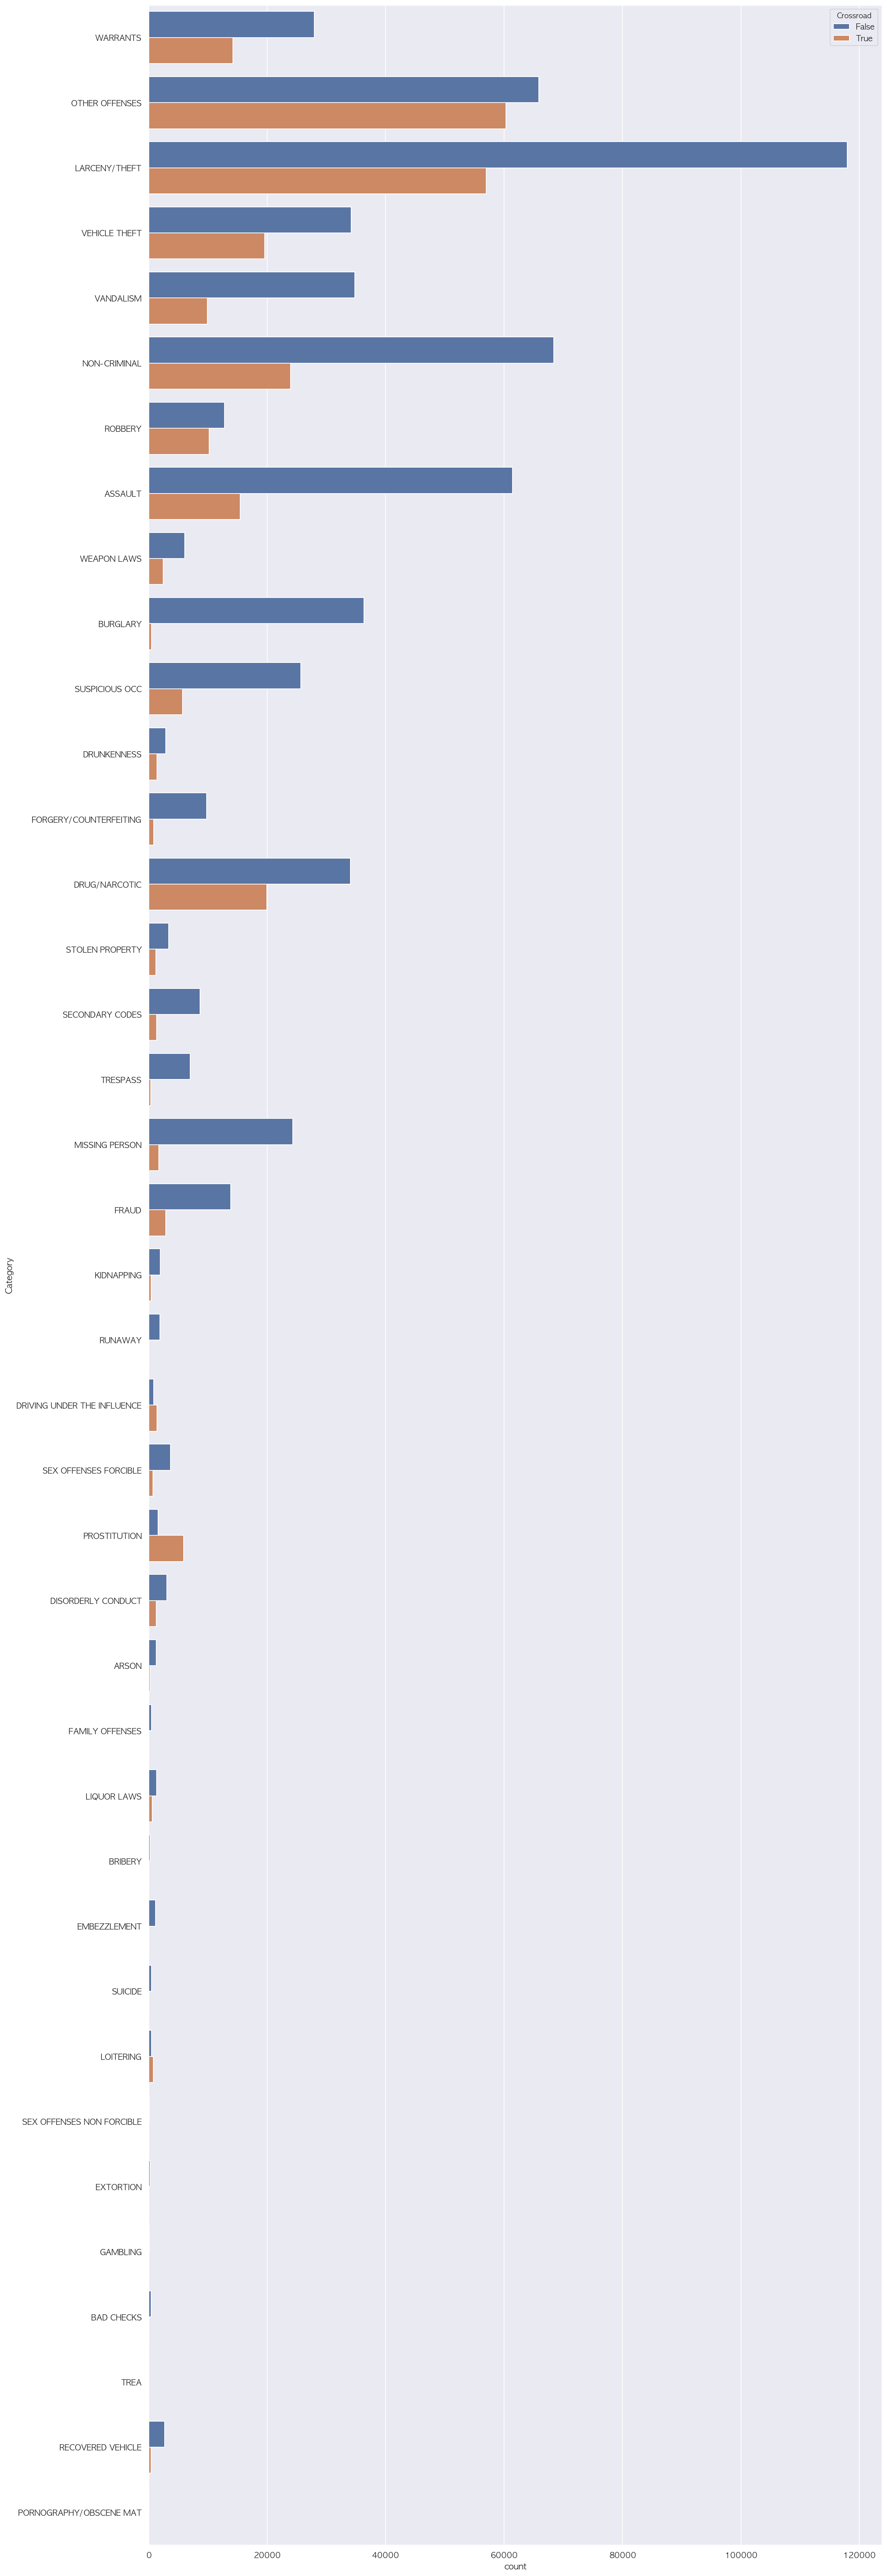

In [224]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, hue="Crossroad", y="Category")

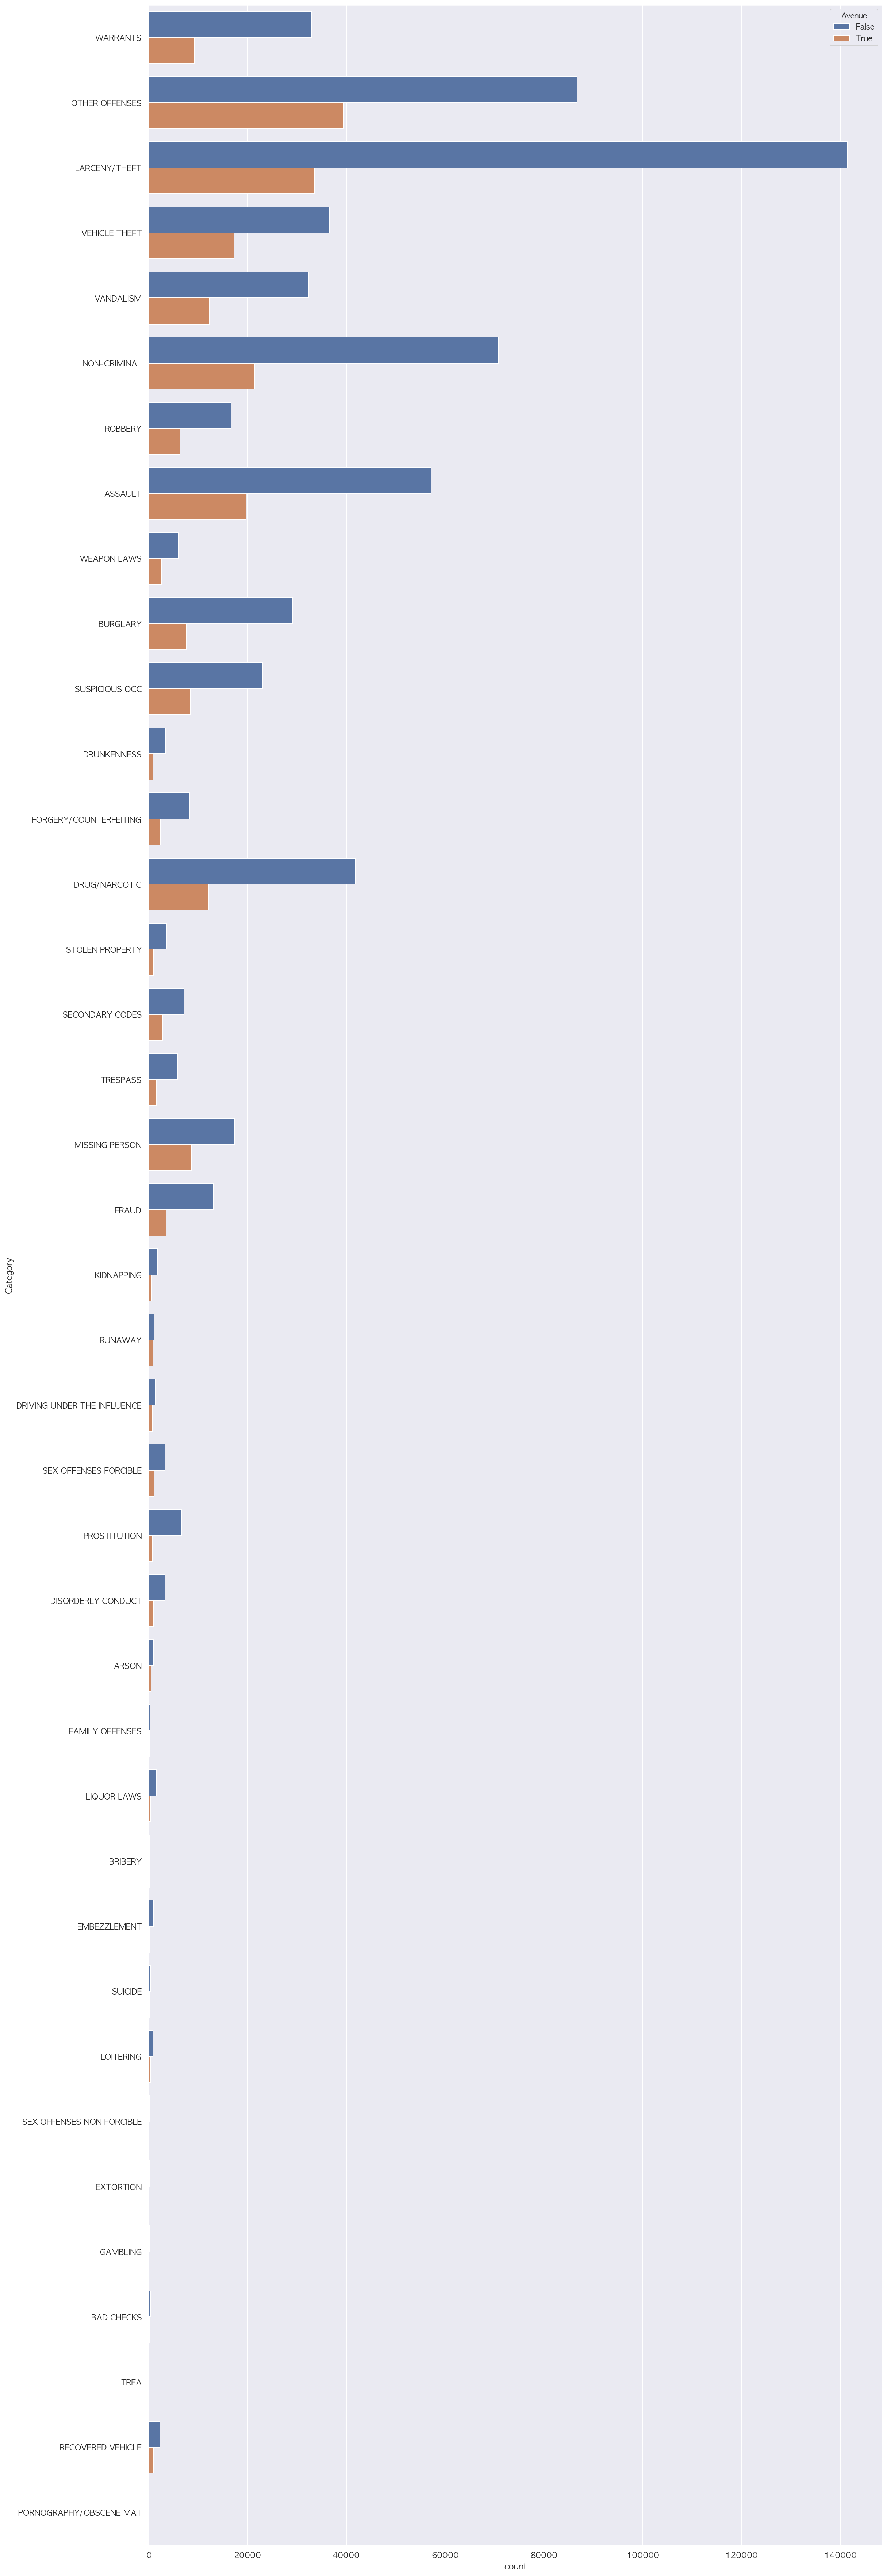

In [225]:
train["Avenue"] = train["Address"].str.contains("AV")
plt.figure(figsize = (18, 64))

sns.countplot(data=train, hue="Avenue", y="Category")

Avenue가 Street보다 크기 때문에 일어날 수 있는 범죄의 유형이 다를 수 있기 때문에 (보통 범죄자들은 대로변에서 범죄를 대놓고 저지르지 않을 거라는 가설) 모델이 예측하는데 유용한 feature로 활용할수 있을 것 같음. 실제로 시각화를 통해서도 AV가 포함된 곳에선 범죄가 일어나지 않은 것을 알수있음 (# False > # True)